<a href="https://colab.research.google.com/github/jmontes163/test_01/blob/main/OTOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch as th

In [ ]:
i=complex(0,1)
pi=th.pi


nps=[339,420,492,540,630,690,747,807,900,1107,243,3936,5685,7437,9186,10935,12684,14436,16185,17934]

#Seleccionamos la N que queremos para nuestro operador

Ni = 6

for N in nps[Ni:Ni+1]:
  n3=N//3
  Ao=np.sqrt(1.0/(4.0*pi*float(N)))
  Alpha=np.sqrt(2.)*(Ao**(1./4.))/(pi**(1./4.));
  hbar=(2.*pi*N)**(-1.);

print(N)


747


In [ ]:
#Creamos el Operador evolución abierto.

TB1=np.zeros([n3,n3])
TBT=np.zeros([N,N])

TB1=TB1.astype(complex)
TBT=TBT.astype(complex)

GD=np.zeros([N,N])
PF=np.zeros([N,N])

GD=GD.astype(complex)
PF=PF.astype(complex)

k, p = np.meshgrid(np.arange(n3), np.arange(n3), indexing='ij')
TB1=(1.0/np.sqrt(float(n3)))*np.exp(-2.0*i*pi*(k+0.5)*(p+0.5)/float(n3))

TBT[0:n3,0:n3]=TB1
TBT[n3:2*n3,n3:2*n3]=TB1
TBT[2*n3:N,2*n3:N]=TB1

Z=0.0

TBT[n3:2*n3,n3:2*n3]=TBT[n3:2*n3,n3:2*n3]*Z

k, p = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')
GD=(1.0/np.sqrt(float(N)))*np.exp(2*i*pi*(k+0.5)*(p+0.5)/float(N))
PF=np.dot(GD,TBT)


In [ ]:
#Creamos el Operador evolución cerrado.

TB1c=np.zeros([n3,n3])
TBTc=np.zeros([N,N])

TB1c=TB1c.astype(complex)
TBTc=TBTc.astype(complex)

GDc=np.zeros([N,N])
PFc=np.zeros([N,N])

GDc=GDc.astype(complex)
PFc=PFc.astype(complex)

k, p = np.meshgrid(np.arange(n3), np.arange(n3), indexing='ij')
TB1c=(1.0/np.sqrt(float(n3)))*np.exp(-2.0*i*pi*(k+0.5)*(p+0.5)/float(n3))

TBTc[0:n3,0:n3]=TB1c
TBTc[n3:2*n3,n3:2*n3]=TB1c
TBTc[2*n3:N,2*n3:N]=TB1c

Zc=1.0

TBTc[n3:2*n3,n3:2*n3]=TBTc[n3:2*n3,n3:2*n3]*Zc

k, p = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')
GD=(1.0/np.sqrt(float(N)))*np.exp(2*i*pi*(k+0.5)*(p+0.5)/float(N))
PFc=np.dot(GD,TBT)


In [ ]:
lamd, Pfi = np.linalg.eig(PF) #Se calculas los autovalores

In [ ]:
def apert(n, Z):
    # Se crean las tres matrices identidad para un Z
    n3 = n // 3
    TB1 = np.eye(n3, dtype=complex)
    TB2 = np.eye(n3, dtype=complex) * Z
    TB3 = np.eye(n3, dtype=complex)

    # Se crea una matriz cuadrada nxn llena de ceros
    TBT = np.zeros((n, n), dtype=complex)

    # Se asignan las matrices identidad a los bloques de la matriz cuadrada
    TBT[0:n3, 0:n3] = TB1
    TBT[n3:2*n3, n3:2*n3] = TB2
    TBT[2*n3:, 2*n3:] = TB3

    return TBT


In [ ]:
bak=PF
bakc=PFc

tau = 20
X2d = apert(N, Z)
P2d = apert(N, Z)

#Propagar una vex hacia delante (abierto)
#P2d = np.matmul(P2d, bak)
#P2d = np.matmul(np.transpose(np.conj(bak)), P2d)

#Propagar una vex hacia atras (cerrado)
P2d = np.matmul(P2d, np.transpose(np.conj(bakc)))
P2d = np.matmul(bakc, P2d)

Hus = np.zeros((1, tau), dtype=complex)
for c in range(tau):
    eigenvectors = np.zeros((N, N), dtype=complex)
    eigenvectors = np.matmul(X2d, P2d)
    eigenvectorsb = np.matmul(P2d, X2d)
    eigenvectors = eigenvectors - eigenvectorsb
    eigenvectors = np.matmul(eigenvectors, np.transpose(np.conj(eigenvectors)))

    O2 = np.sum(np.diagonal(eigenvectors))
    O2b = np.sqrt(np.conj(O2)*O2)
    Hus[0, c] = O2b.real

    X2d = np.matmul(X2d, bak)
    X2d = np.matmul(np.transpose(np.conj(bak)), X2d)



[ 1.51049857+0.j  3.77173663+0.j  7.08748324+0.j 11.6102367 +0.j
 16.62619256+0.j 15.88161355+0.j  7.2065955 +0.j  3.78868275+0.j
  1.94194413+0.j  1.0882788 +0.j  0.6347626 +0.j  0.39689957+0.j
  0.25605528+0.j  0.1757091 +0.j  0.12325879+0.j  0.08945231+0.j
  0.0661891 +0.j  0.05042227+0.j  0.03917222+0.j  0.03102421+0.j]


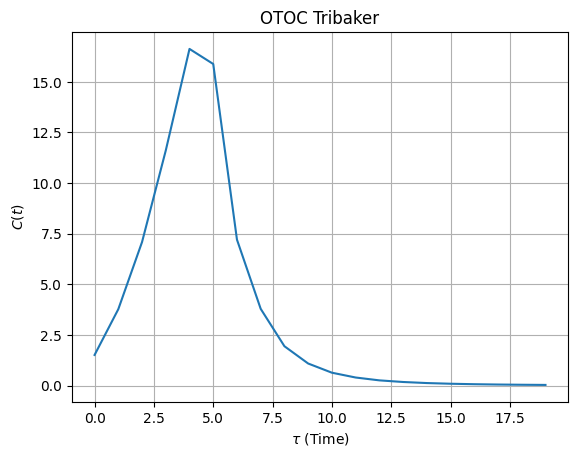

In [ ]:
import matplotlib.pyplot as plt

# Antes de llamar a este código, asegúrate de haber definido correctamente tau.
print(Hus[0,:])
tau_values = range(tau)

plt.plot(tau_values, Hus[0,:])
plt.xlabel(r'$\tau$ (Time)')
plt.ylabel('$C(t)$')
plt.title('OTOC Tribaker')
plt.grid(True)
plt.show()
